### HW 1-3

- MNIST data, 10 class classification
- output layer를 제외하고 모든 hidden layer의 activation function을 relu로 통일
- loss: categorical_crossentropy 사용
- hidden layer: 총 9층, 각 layer는 256개 neuron
- train data는 60,000개의 example => train data 55,000개, validation data 5,000개
- 미니배치 64개
- epoch수 15
- learning rate 0.1 and 0.01
- train loss와 val loss 함께 볼 수 있는 그래프(learning curve) 그리기
- train accuracy와 val accuracy를 함께 볼 수 있는 그래프 (learning curve) 그리기
- 최종 performance 출력

Keras 빌트인 데이터 Cifar100를 이용하여 20 class classification을 하세요 (label mode를 coarse로 선택). Train data는 50,000개의 examples를 포함하는데 이 것을 split하여 train data로 45,000개를 만들고 validation data로 5,000개를 만드세요. 나머지는 1-1과 모든 것을 동일하게 수행하세요.

#### 1. importing data

In [1]:
from keras.datasets import cifar100

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data('coarse')

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
len(y_train)

50000

In [5]:
y_train

array([[11],
       [15],
       [ 4],
       ...,
       [ 8],
       [ 7],
       [ 1]])

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
len(y_test)

10000

In [8]:
y_test

array([[10],
       [10],
       [ 0],
       ...,
       [ 4],
       [ 8],
       [ 2]])

#### 2. building network

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(32*32*3,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(20, activation='softmax'))

#### 3. setting optimizers

In [10]:
from keras import optimizers

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### 4. preparing image data

In [11]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32') / 255

#### 5. preparing label

In [12]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### 6. validation

In [14]:
x_val = x_train[45000:]
partial_x_train = x_train[:45000]

y_val = y_train[45000:]
partial_y_train = y_train[:45000]

#### 7. model (network) training

In [15]:
history = network.fit(partial_x_train,
                   partial_y_train,
                   epochs=15,
                   batch_size=64,
                   validation_data=(x_val, y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 27s 598us/step - loss: 0.1890 - accuracy: 0.9498 - val_loss: 0.1860 - val_accuracy: 0.9500
Epoch 2/15
45000/45000 [==============================] - 24s 524us/step - loss: 0.1793 - accuracy: 0.9501 - val_loss: 0.1832 - val_accuracy: 0.9495
Epoch 3/15
45000/45000 [==============================] - 26s 579us/step - loss: 0.1742 - accuracy: 0.9506 - val_loss: 0.1930 - val_accuracy: 0.9493
Epoch 4/15
45000/45000 [==============================] - 23s 511us/step - loss: 0.1705 - accuracy: 0.9510 - val_loss: 0.1733 - val_accuracy: 0.9507
Epoch 5/15
45000/45000 [==============================] - 25s 550us/step - loss: 0.1679 - accuracy: 0.9513 - val_loss: 0.1756 - val_accuracy: 0.9499
Epoch 6/15
45000/45000 [==============================] - 24s 523us/step - loss: 0.1658 - accuracy: 0.9516 - val_loss: 0.1724 - val_accuracy: 0.9506
Epoch 7/15
45000/45000 [==============================] -

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### 8. plotting training and validation loss

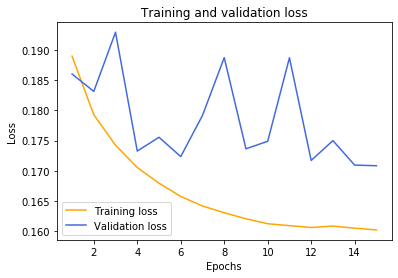

In [17]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'royalblue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

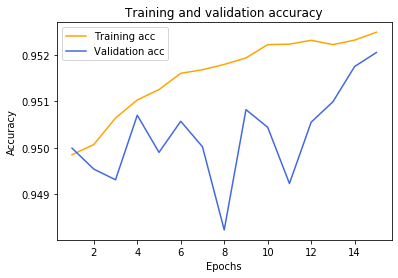

In [18]:
plt.clf() # clear figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'royalblue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 9. results

In [19]:
results = network.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 222us/step


In [20]:
results

[0.17076183593273161, 0.9517199993133545]